# 13. Reinforcement Learning
Reinforcement learning is a type of Machine Learning where an agent learns to behave in an environment by performing actions and seeing the results.<br>
It is all about taking an action in order to maximize the reward in particular situation.

Reinforcement Learning system is comprised of two main components:<br>
<b>Agent</b>The RL algorithm that learns from trial and error<br>
<b>Environment</b>The world through which the agent moves<br>

<b>Action (A)</b> All the possible steps that the agent can take<br>
<b>State (S)</b> Current condition returned by the environment<br>
<b>Reward (R)</b> An instant return from the environment to appraise the last action<br>
<b>Policy (pi)</b> The approach that the agent uses to determine the next action based on the current state<br>
<b>Value (V)</b> The expected long-term return with discount, as opposed to the short-term reward R<br>
<b>Action-value (Q)</b> This similar to Value, except, it takes an extra parameter, the current action (A)<br>


Step1: Reinforcement learning process starts when environment send a stage to the agent.<br>
step2:Then the agent takes some actions based on the observation, <br>
step3:in turn environment will send the next stage and respective feedback/reward to the agent.<br>
step4: The agent update its knowledge with reward returned by the environment<br>
step5: repeat step 2 to 4 untill environment sends the terminal stage to agent.<br>
The agent has accomplished all his tasks and finally gets the reward.


### Reward Maximization
Reward maximization theory states that, a RL agent must be trained in such a way that,
he takes the best action so that the reward is maximum. ex: fox want to eat meat to maximize the reward before get eaten by tiger. eats meat closer to him and not the meat closer to tiger because of the risk which is called discounting the reward represented by gamma.  if gamma=1 then the agent is try to get the discounting reward.

### Exploration and Exploitation
<b>Exploitation</b> is about using the already known exploited information to heighten the rewards.<br>
<b>Exploration</b> is about exploring and capturing more information about an environment.<br>


## Markov Decision Learning
The mathematical approach for mapping a solution in reinforcement learning is called Markov Decision Process (MDP).
<pre>
The following parameters are used to attain a solution:
• Set of actions, A
• Set of states, S
• Reward, R
• Policy, pi
• Value, V

Goal: Find the shortest path between A and D with minimum possible cost
In this problem,
• Set of states are denoted by nodes i.e. {A, B, C, D}
• Action is to traverse from one node to another {A -> B, C -> D}
• Reward is the cost represented by each edge
• Policy is the path taken to reach the destination {A -> C -> D} = 65

its called exploitation but we need to do exploration for all the policies
</pre>

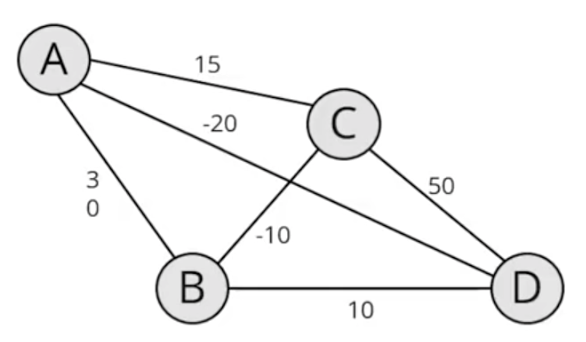

## Q Learning with an example
Place an agent in any one of the rooms (0,1,2,3,4) and the goal is to reach outside the building (room 5)<br>
<pre>
• 5 rooms in a building connected by doors
• each room is numbered 0 through 4 
• The outside of the building can be thought of as one big room (5)
• Doors 1 and 4 lead into the building from room 5 (outside)
</pre>
Lets represent the rooms in form of graph

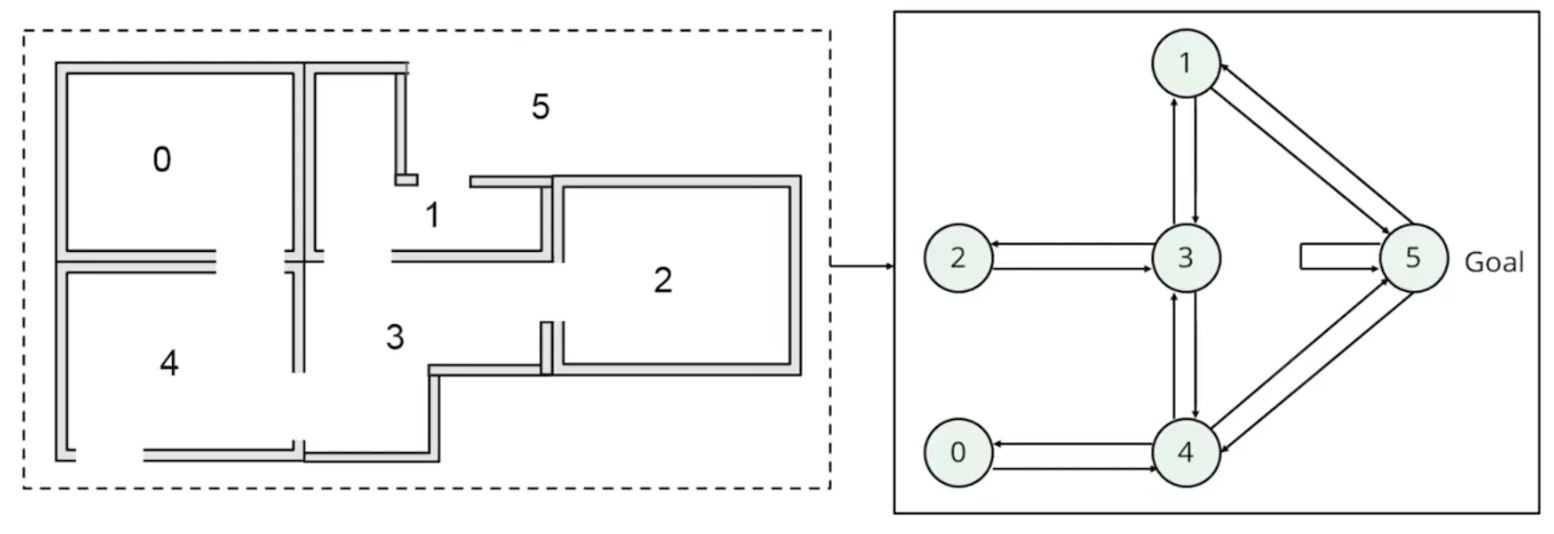

next step is to associate a reward value to each door

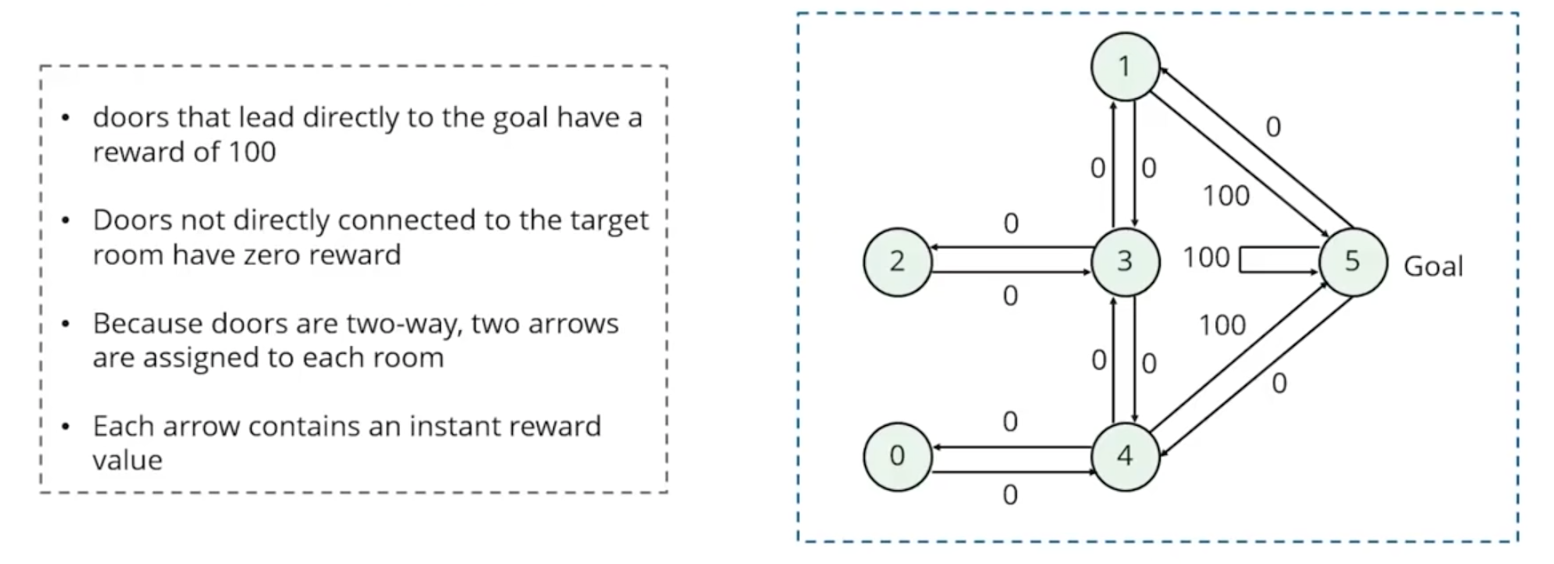

<pre>
The terminology in Q-Learning includes the terms state and action:
• Room (including room 5) represents a state
• agent's movement from one room to another represents an action
• In the figure, a state is depicted as a node, while "action" is represented by the arrows
</pre>

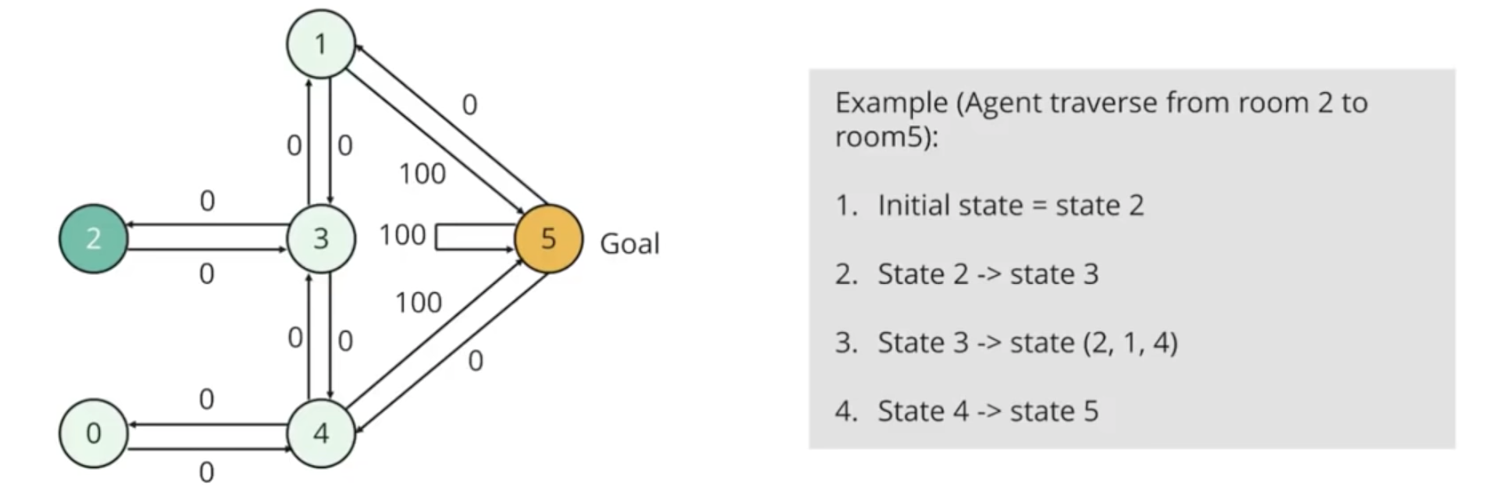

We can put the state diagram and the instant reward values into reward table, matrix R.
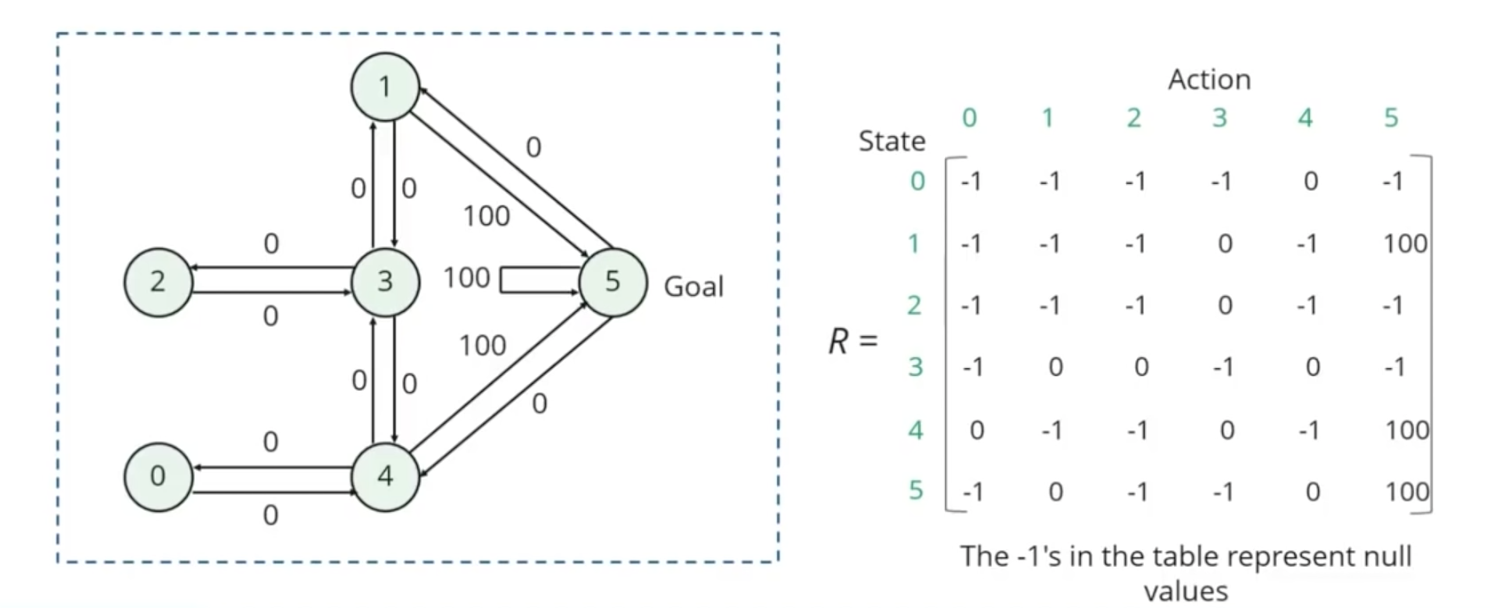


<pre>
Add another matrix Q, representing the memory of what the agent has learned through experience.
• The rows of matrix Q represent the current state of the agent
• columns represent the possible actions leading to the next state
• Formula to calculate the O matrix:
<b>Q(state, action) = R(state, action) + Gamma * Max [Q(next state, all actions)]</b>

First step is to set the value of the learning parameter Gamma = 0.8, and the initial state as Room 1.
Next, initialize matrix O as a zero matrix:
• From room 1 you can either go to room 3 or 5, let's select room 5.
• From room 5, calculate maximum Q value for this next state based on all possible actions:
Q(state, action) = (state, action) + Gamma * Max[Q(next state, all actions)]
Q(1,5) = R(1,5) + 0.8 * Max[Q(5, 1), Q(5,4), Q(5,5)] = 100 + 0.8 * 0 = 100
</pre>
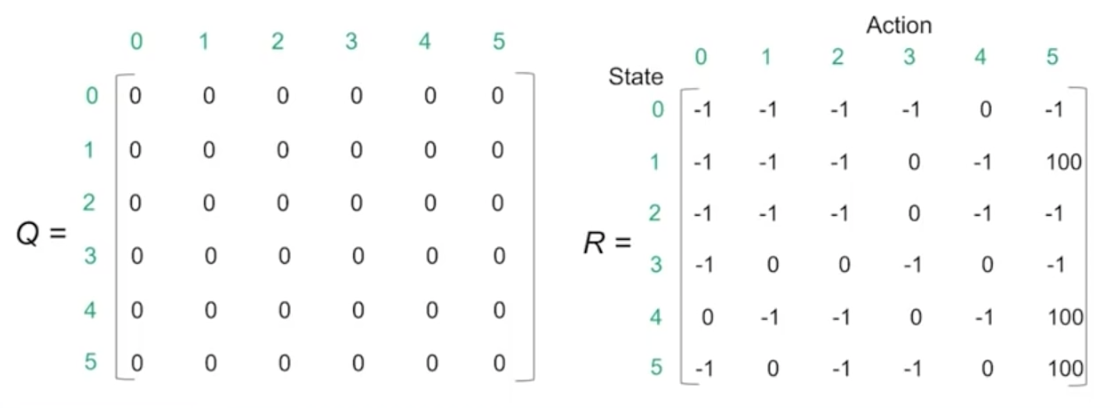

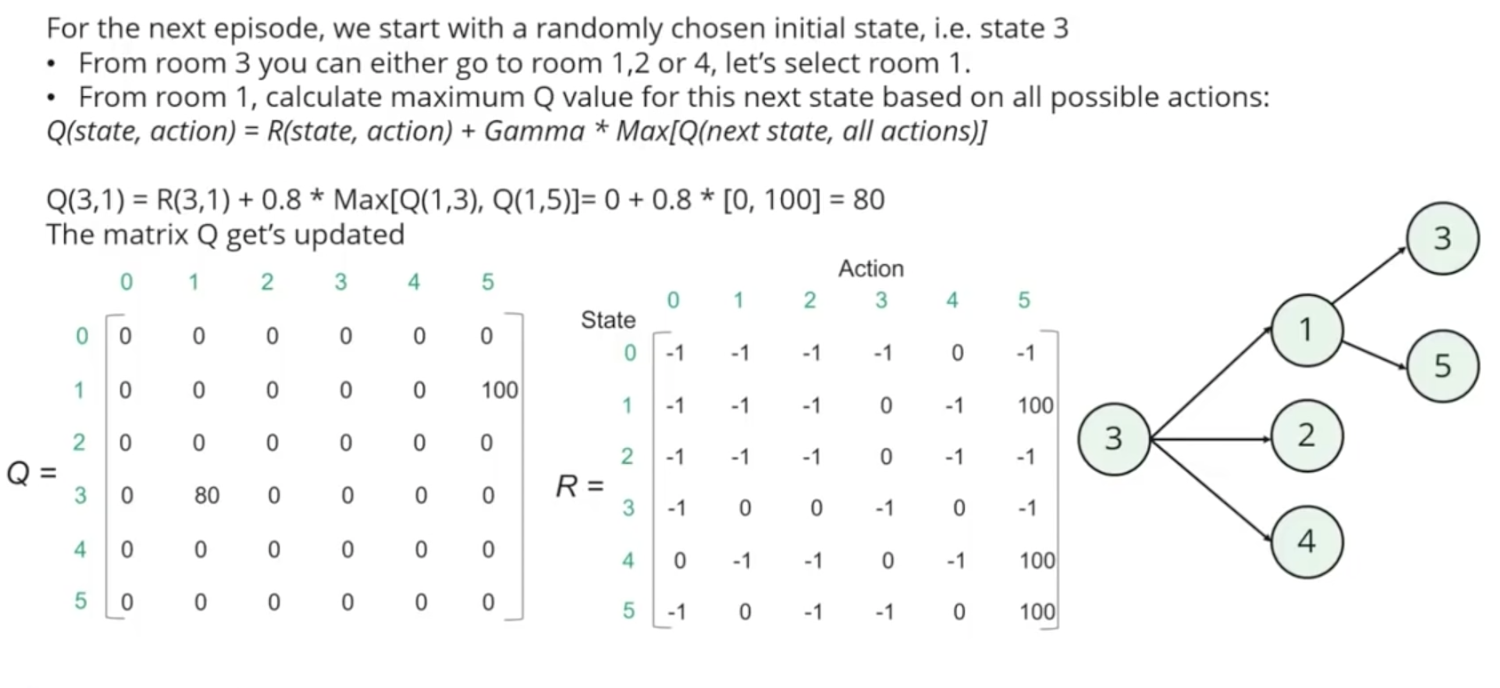



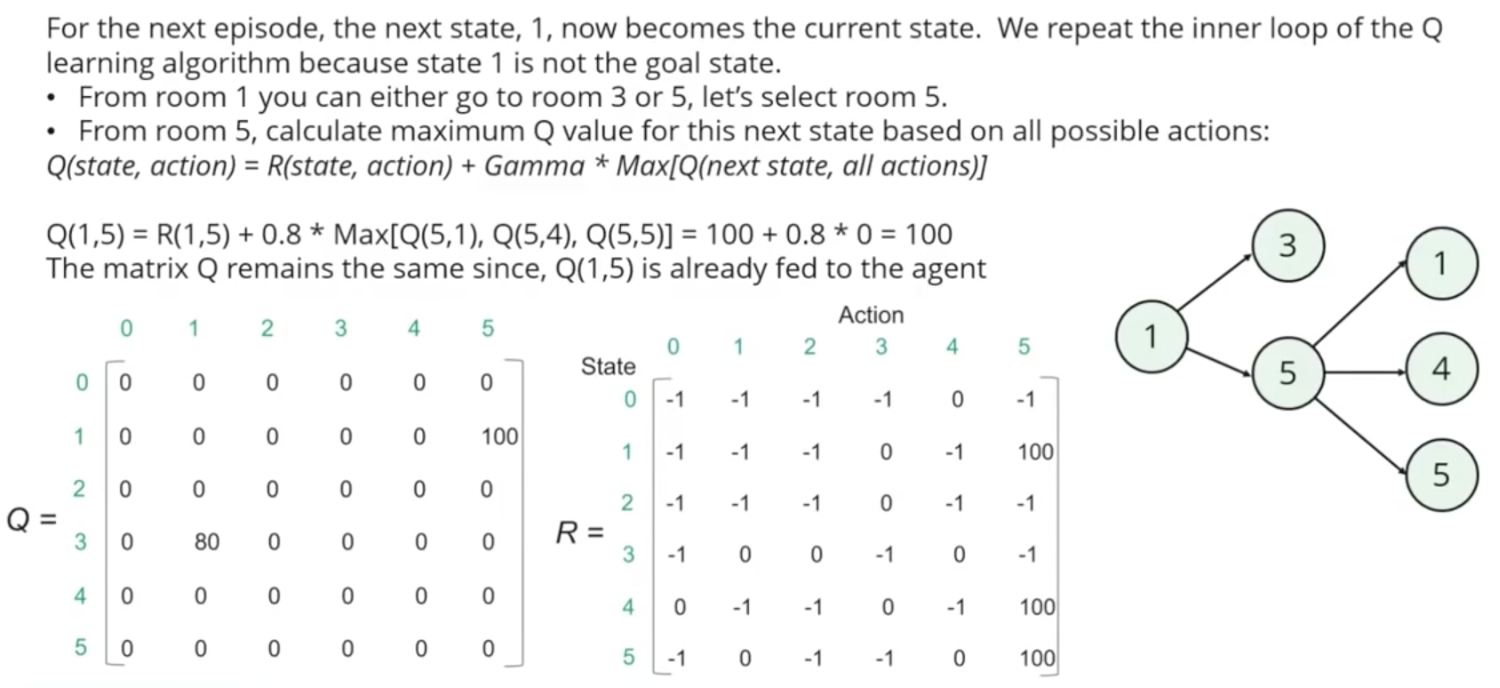

### Q Learning Algorithm
(1) Set the gamma parameter, and environment rewards in matrix R<br>
(2) Initialize matrix Q to zero<br>
(3) Select a random initial state<br>
(4) Set initial state = current state<br>
(5) Select one among all possible actions for the current state<br>
(6) Using this possible action, consider going to the next state<br>
(7) Get maximum Q value for this next state based on all possible actions<br>
(8) Compute: Q(state, action) = R(state, action) + Gamma * Max[Q(next state, all actions)]<br>
(9) Repeat above steps until current state = goal state<br>

In [7]:
import numpy as np

R = np.matrix ([
    [-1,-1,-1,-1,0,-1],
    [-1,-1,-1,0,-1,100],
    [-1,-1,-1,0,-1,-1],
    [-1,0,0,-1,0,-1],
    [-1,0,0,-1,-1,100],
    [-1,0,-1,-1,0, 100]
])
print(R)
Q = np.matrix(np.zeros([6,6]))
print(Q)
gamma = 0.8
initial_state = 1

def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

# Get available actions in the current state
available_act = available_actions(initial_state)


# This function chooses at random which action to be performed within the range
# of all the available actions.
def sample_next_action(available_actions_range):
    next_action = int (np.random.choice(available_act, 1))
    return next_action

# Sample next action to be performed
action = sample_next_action(available_act)


# This function updates the Q matrix according to the path selected and the Q
# learning algorithm
def update(current_state, action, gamma):
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size=1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]
    
    #Q learning formula
    Q[current_state, action] = R[current_state, action] + gamma * max_value

    
#update Q matrix
update(initial_state,action,gamma)

#--------training----------


# Train over 10 000 iterations. (Re-iterate the process above).
for i in range (10000):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    update(current_state, action, gamma)



# Normalize the "trained" Q matrix 
print ("Trained Q matrix:")
print (Q / np.max(Q) * 100)


#-----------------testing-----------------

# Goal state = 5
# Best sequence path starting from 2 -> 2, 3, 1,
current_state = 2
steps = [current_state]
while current_state != 5:
    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size=1))
    else:
        next_step_index = int(next_step_index)
    steps.append(next_step_index)
    current_state = next_step_index 

#Print selected sequence of steps
print("Selected path:")
print(steps)


[[ -1  -1  -1  -1   0  -1]
 [ -1  -1  -1   0  -1 100]
 [ -1  -1  -1   0  -1  -1]
 [ -1   0   0  -1   0  -1]
 [ -1   0   0  -1  -1 100]
 [ -1   0  -1  -1   0 100]]
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
Trained Q matrix:
[[  0.    0.    0.    0.   80.    0. ]
 [  0.    0.    0.   64.    0.  100. ]
 [  0.    0.    0.   64.    0.    0. ]
 [  0.   80.   51.2   0.   80.    0. ]
 [  0.   80.   51.2   0.    0.  100. ]
 [  0.   80.    0.    0.   80.  100. ]]
Selected path:
[2, 3, 4, 5]
